# Iteration 2: Training using 2 second sample clips 

In [1]:
import numpy as np 
import librosa.display
import os 
import matplotlib.pyplot as plt 
import scipy

In [2]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    direc = os.listdir(input_path)

    for i, file in enumerate(direc):
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

In [22]:
# laugh
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean_2/laugh', '/Users/calzada/birdsongs/wood/01_data/spects_2/laugh')

In [23]:
# drum
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean_2/drum', '/Users/calzada/birdsongs/wood/01_data/spects_2/drum')

In [24]:
# pik
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean_2/pik', '/Users/calzada/birdsongs/wood/01_data/spects_2/pik')

In [3]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        if file.endswith('.png'):
            # added image array to list
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            # label array add 
            labels.append((label))
        
    return images, labels

def show_images(images):
    num_images = len(images)
    print(num_images)
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        if i < 5:  # only plot first 5 in the dir 
            ax.imshow(images[i] / 255)
        else:
            ax.axis('off')  # Turn off empty subplots
    
    #plt.tight_layout()
    plt.show()

In [10]:
x = []
y = []

96


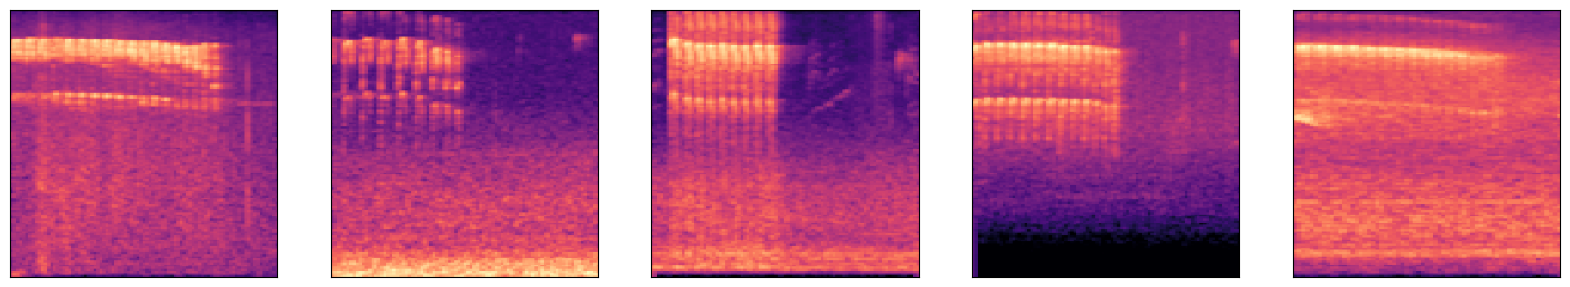

In [11]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects_2/laugh', 0)
show_images(images)
x += images
y += labels

28


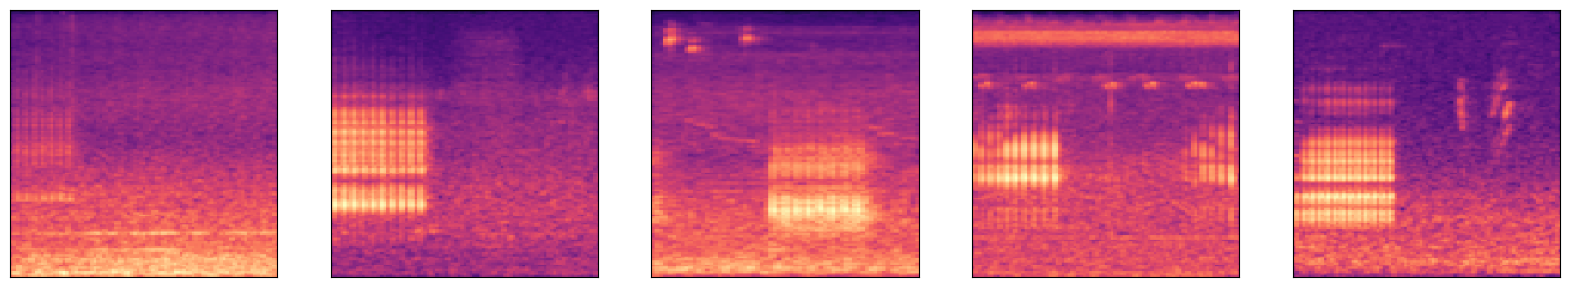

In [12]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects_2/drum', 1)
show_images(images)
x += images
y += labels

36


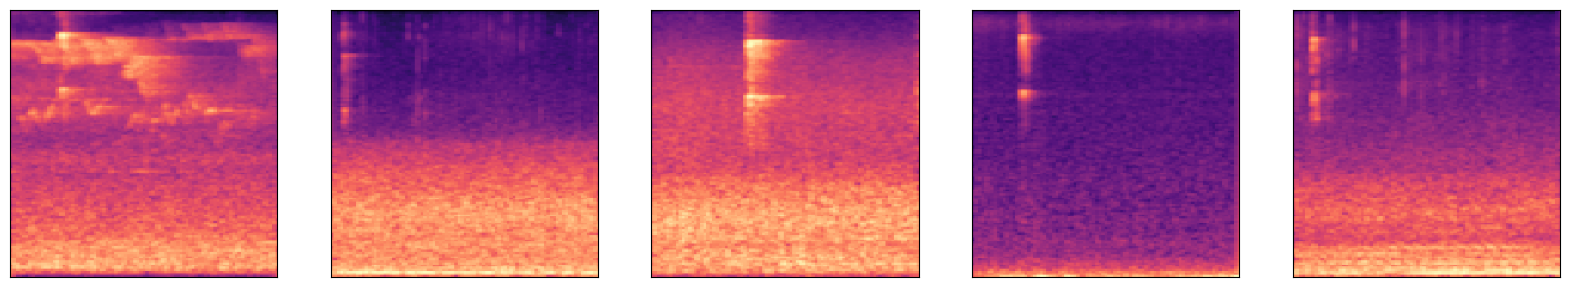

In [13]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects_2/pik', 2)
show_images(images)
x += images
y += labels

In [8]:
laughs_2 = '/Users/calzada/birdsongs/wood/01_data/clean_2/pik'
laugh_wavs = [os.path.join(laughs_2, x) for x in os.listdir(laughs_2)]

for laugh in laugh_wavs:
    y, sr = librosa.load(laugh, sr = None)
    time = len(y)/sr
    print(f'{laugh} time: {time}')
    

/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_613669818.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_522725601.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_519072681.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_612959583.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_564833211.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_513271751.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_611874434.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_609431998.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_518754901.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_612276363.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_508251571.wav time: 2.0
/Users/calzada/birdsongs/wood/01_data/clean_2/pik/trimmed_592245551.wav time: 2.0
/Users/calzada/b

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.1, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 2s 133ms/step - loss: 1.0817 - accuracy: 0.5625 - val_loss: 0.9377 - val_accuracy: 0.6875
Epoch 2/10
15/15 [==============================] - 2s 129ms/step - loss: 0.7245 - accuracy: 0.6736 - val_loss: 0.6102 - val_accuracy: 0.6875
Epoch 3/10
15/15 [==============================] - 2s 130ms/step - loss: 0.4913 - accuracy: 0.7986 - val_loss: 0.4806 - val_accuracy: 0.7500
Epoch 4/10
15/15 [==============================] - 2s 129ms/step - loss: 0.6130 - accuracy: 0.7778 - val_loss: 0.6229 - val_accuracy: 0.8125
Epoch 5/10
15/15 [==============================] - 2s 129ms/step - loss: 0.3803 - accuracy: 0.8819 - val_loss: 1.3861 - val_accuracy: 0.8125
Epoch 6/10
15/15 [==============================] - 2s 132ms/step - loss: 0.1961 - accuracy: 0.9375 - val_loss: 1.0552 - val_accuracy: 0.6875
Epoch 7/10
15/15 [==============================] - 2s 132ms/step - loss: 0.2092 - accuracy: 0.9444 - val_loss: 0.7518 - val_accuracy: 0.6875
Epoch 

[]

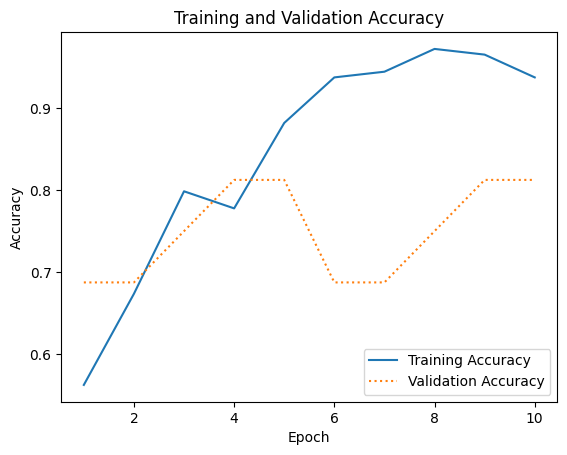

In [17]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

1/1 [==============================] - 0s 63ms/step


In [19]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 1s 52ms/step - loss: 43.3745 - accuracy: 0.6736 - val_loss: 4.7065 - val_accuracy: 0.9375
Epoch 2/10
15/15 [==============================] - 1s 50ms/step - loss: 0.8772 - accuracy: 0.9583 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 1s 50ms/step - loss: 0.7638 - accuracy: 0.9861 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 1s 50ms/step - loss: 1.1179 - accuracy: 0.9861 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 1s 50ms/step - loss: 2.4209e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 1s 50ms/step - loss: 0.1841 - accuracy: 0.9931 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 1s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - v

[]

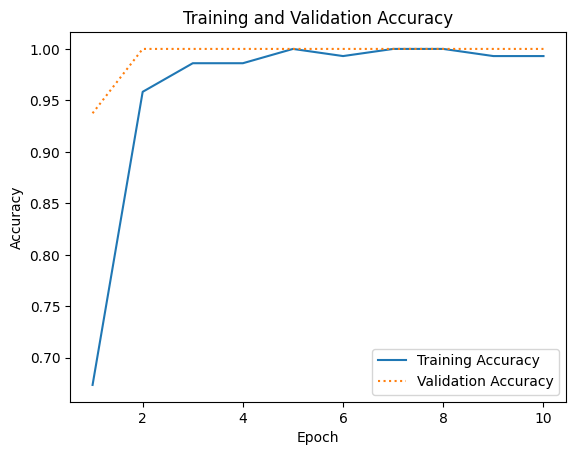

In [21]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1/1 [==============================] - 0s 35ms/step


Text(110.44999999999997, 0.5, 'Actual call')

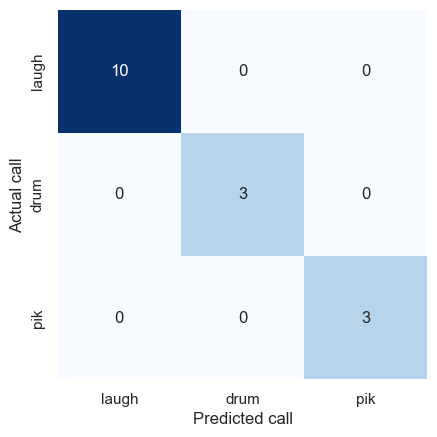

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['laugh', 'drum', 'pik']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted call')
plt.ylabel('Actual call')

In [23]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import soundfile as sf
import shutil

# Function to create spectrogram and return it as NumPy array
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    return log_ms, sr  # return spectrogram (log mel spec) and sample rate

# Function to preprocess spectrogram data and return as model input
def create_chunk_image_data(log_ms, sr, chunk_num):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    librosa.display.specshow(log_ms, sr=sr)
    img_file = f'temp_spec_{chunk_num}.png'
    fig.savefig(img_file)
    plt.close(fig)
    x = image.load_img(img_file, target_size=(224, 224))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    os.remove(img_file)
    return x

# predict on each chunk/window
def predict_chunk(x):
    #prediction = base_model.predict(chunk)
    y = base_model.predict(x)
    predictions = model.predict(y)

    return predictions

# Function to process WAV file with sliding window and overlap
def process_wav_with_overlap(wav_file, output_path, chunk_size=1.0, overlap=0.5):
    # load in wav file
    y, sr = librosa.load(wav_file, sr=None)
    print(f'len(y): {len(y)}, sr: {sr}')

    # Calculate parameters: sample num and hop size
    chunk_size_samples = int(chunk_size * sr)  # convert chunk size from seconds to # samples
    print(f'chunk size: {chunk_size_samples}')
    
    hop_size_samples = int(chunk_size_samples * (1 - overlap))  # hop size based on overlap percentage
    print(f'hop size: {hop_size_samples}')
    
    # Initialize predictions dictionary    
    class_predictions = {
        'laugh' : [], 
        'drum' : [], 
        'pik' : []
    }
    
    if os.path.exists(output_path):
        # Clear the directory if it exists
        shutil.rmtree(output_path)
        os.makedirs(output_path)
    else:
        # Create the directory if it does not exist
        os.makedirs(output_path)
    
    chunk_num = 0
    i = 0
    
    # Process the WAV file with sliding window and overlap
    #while i < len(y) - chunk_size_samples + 1:
    while i + chunk_size_samples <= len(y):

        # Extract the current chunk
        # this is currently an array but need as fp of wav
        chunk = y[i:i + chunk_size_samples] 
        
        # export the chunk wav to a temporary chunk dir 
        chunk_file = os.path.join(output_path, f'chunk_{chunk_num}.wav')
        sf.write(chunk_file, chunk, sr)
        
        length = len(chunk)
        duration = length / sr
    
        print(f"{chunk_file}: {duration} seconds, length: {length}, sr = {sr}")
        
        # Create spectrogram for the chunk
        log_ms, _ = create_spectrogram(chunk_file)

        # Preprocess spectrogram data for model input
        x = create_chunk_image_data(log_ms, sr, chunk_num)

        # Make prediction for the chunk
        prediction = predict_chunk(x)
        #print(prediction)

        # Store or process the prediction as needed
        class_predictions['laugh'].append(prediction[0][0])  # Adjust indexing based on your model output
        class_predictions['drum'].append(prediction[0][1])
        class_predictions['pik'].append(prediction[0][2])
        
        chunk_num += 1
        #i += hop_size_samples  # Move to the next chunk with overlap
        i += int(chunk_size_samples * (1 - overlap))
    
    return class_predictions

In [27]:
def plot_predictions(pred_dict: dict, fig_size = (15,5)):
    
    # get range of samples (all classes should have the same) 
    x_values = range(len(pred_dict['laugh']))
    
    # plot
    plt.figure(figsize = fig_size)
    
    # plot each class
    plt.plot(x_values, pred_dict['laugh'], label='laugh', marker='o', linestyle='-')
    plt.plot(x_values, pred_dict['drum'], label='drum', marker='s', linestyle='-')
    plt.plot(x_values, pred_dict['pik'], label='pik', marker='^', linestyle='-.')
    
    plt.xlabel('Window/Index')
    plt.ylabel('Probability')
    plt.title('Probability Time Series for Each Class')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### sample 1: drum

In [29]:
wav_file1 = '/Users/calzada/birdsongs/wood/01_data/wav_files/518043091.wav'
output_path = os.path.join(os.getcwd(), 'test_chunk_wavs_2')
print(output_path)

/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs


In [40]:
pred1 = process_wav_with_overlap(wav_file1, output_path, chunk_size=1, overlap=0.0)

len(y): 803904, sr: 44100
chunk size: 44100
hop size: 44100
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 28ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 28ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 31ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 33ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_5.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] -

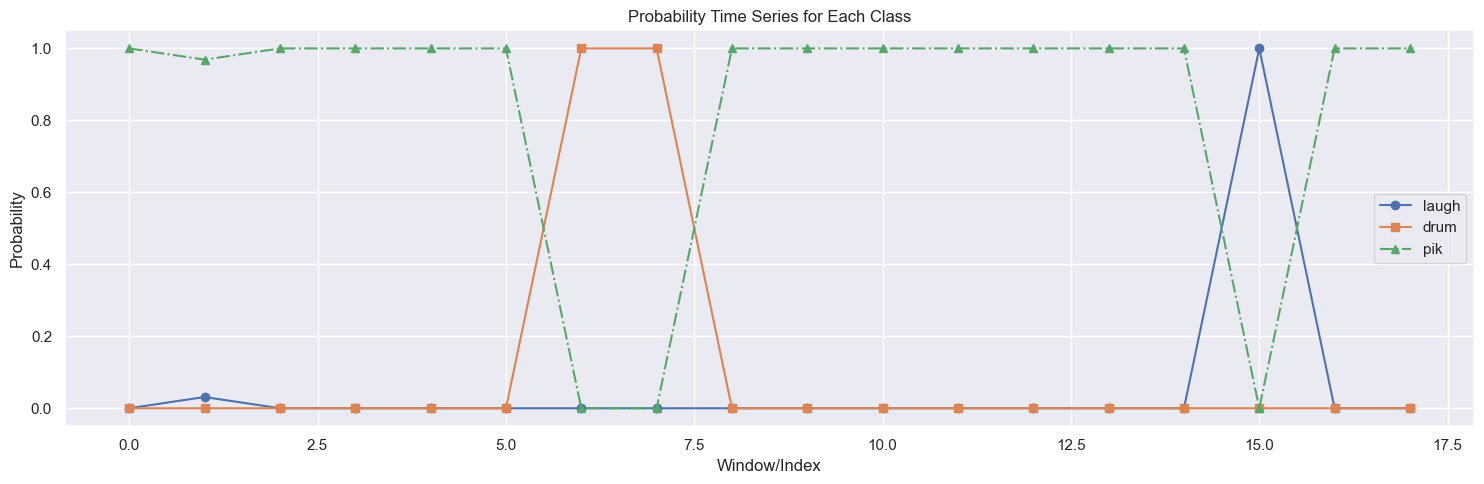

In [41]:
plot_predictions(pred1)

### sample 2: piks and laughs 

In [48]:
wav_file2 = '/Users/calzada/birdsongs/wood/01_data/wav_files/619601764.wav'
output_path = os.path.join(os.getcwd(), 'test_chunk_wavs_2')
print(output_path)

/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2


In [50]:
pred2 = process_wav_with_overlap(wav_file2, output_path, chunk_size=1, overlap=0.0)

len(y): 3157567, sr: 44100
chunk size: 44100
hop size: 44100
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_0.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_1.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 22ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_2.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_3.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_4.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 28ms/step
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs_2/chunk_5.wav: 1.0 seconds, length: 44100, sr = 44100
1/1 [====================

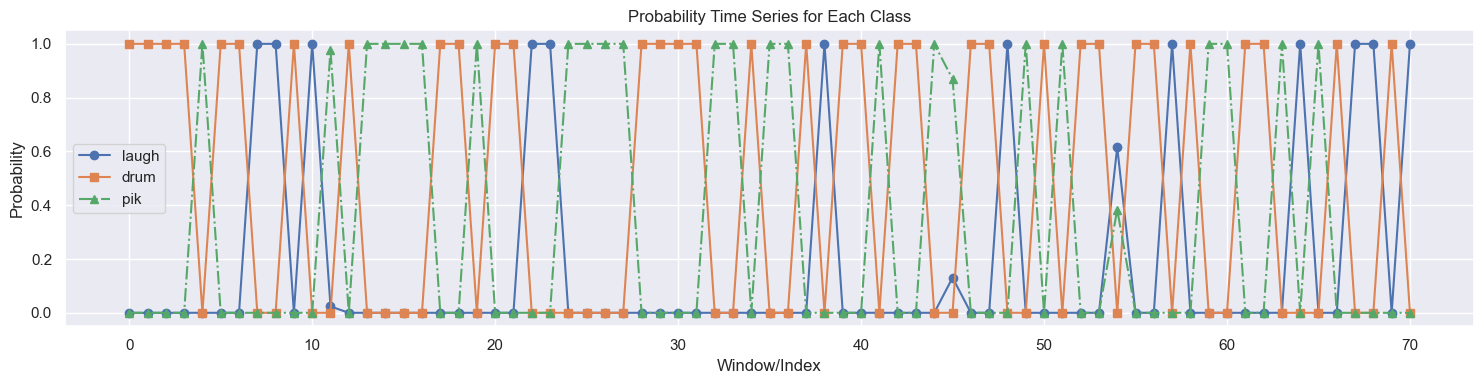

In [53]:
plot_predictions(pred2, fig_size=(15,4))